<div style='background-color:#e0f2fe; color:#1e3a8a; padding:16px; border-radius:8px; border:1px solid #38bdf8; margin-bottom:12px;'>
<b>¿Qué encontrarás en este notebook?</b><br>
<ul>
  <li>Explicaciones desde cero sobre <b>regresión lineal</b> y <b>descenso de gradiente</b>, usando ejemplos sencillos y analogías cotidianas.</li>
  <li>Conceptos clave como <b>datos de entrenamiento</b>, <b>preparación de modelos</b>, <b>medición de desempeño</b> y <b>ajuste de parámetros</b>.</li>
  <li>Guía paso a paso para graficar resultados y aprender a interpretar lo que ves.</li>
  <li>Reflexiones personales para conectar la teoría con la práctica y ayudarte a entender el proceso de verdad.</li>
  <li>Explicaciones visuales y didácticas para que cualquier persona, incluso sin experiencia previa, pueda seguir y aprender.</li>
  <li>¡No te preocupes si nunca has programado antes! Todo está explicado con claridad y ejemplos prácticos.</li>
</ul>
</div>

# Ejercicio Final: Descenso de Gradiente para Regresión Lineal

## Objetivos
En este laboratorio, usted:
- automatizará el proceso de optimización de $w$ y $b$ usando descenso de gradiente.

Nombre estudiante del curso
- JESUS ARIEL GONZALEZ BONILLA

# Documentación Detallada del Ejercicio de Descenso de Gradiente para Regresión Lineal

Este notebook tiene como objetivo documentar de manera precisa y sólida cada paso realizado en el proceso de descenso de gradiente aplicado a la regresión lineal. La documentación está escrita en un lenguaje natural, claro y con buena ortografía, desde mi perspectiva como estudiante, usando siempre la primera persona.

## Propósito del Ejercicio

El propósito principal de este ejercicio es comprender y automatizar el proceso de optimización de los parámetros $w$ y $b$ en un modelo de regresión lineal, utilizando el método de descenso de gradiente. Busco no solo ejecutar el código, sino entender cada una de las etapas involucradas, desde la carga de datos hasta la interpretación de los resultados.

## Librerías Utilizadas

A continuación, describo las librerías y funciones principales utilizadas en el notebook:

- **NumPy**: Permite trabajar con arreglos y realizar operaciones matemáticas de manera eficiente.
- **Matplotlib**: Facilita la visualización de datos y resultados mediante gráficos.
- **Funciones personalizadas**: Se importan rutinas específicas para graficar y analizar el proceso de descenso de gradiente.

## Proceso General

El proceso seguido en este notebook se puede resumir en los siguientes pasos:

1. **Carga de datos**: Defino los datos de entrenamiento, que representan el tamaño de una casa y su precio.
2. **Definición de la función de costo**: Implemento una función que mide qué tan bien el modelo predice los valores reales.
3. **Cálculo del gradiente**: Desarrollo una función que indica la dirección en la que deben ajustarse los parámetros para minimizar el error.
4. **Implementación del descenso de gradiente**: Automatizo el proceso de ajuste de parámetros para encontrar la mejor solución posible.
5. **Visualización y análisis de resultados**: Grafico los resultados y reflexiono sobre el comportamiento del algoritmo.

---

## Reflexión Inicial

<div style='background-color:#FFA50022; color:#b45309; padding:10px; border-radius:6px;'><b>Reflexión personal:</b><br>Al documentar cada paso, me di cuenta de que entender el razonamiento detrás de cada línea de código facilita mi aprendizaje y me permite replicar el experimento en el futuro con mayor seguridad.</div>

In [15]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from ejerc_utils_corhuila import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients
# Se importan las funciones y librerías necesarias para el laboratorio

<div style='background-color:#e0f2fe; color:#1e3a8a; padding:16px; border-radius:8px; border:1px solid #38bdf8; margin-bottom:12px;'>
<b>¿Por qué importamos librerías?</b><br>
<ul>
  <li><b>NumPy</b>: Calculadora avanzada para trabajar con números y arreglos grandes.</li>
  <li><b>Matplotlib</b>: Herramienta para crear gráficos y visualizar resultados fácilmente.</li>
  <li><b>Funciones personalizadas</b>: Permiten ver cómo aprende el modelo y cómo cambian los parámetros.</li>
  <li>Las librerías nos ahorran tiempo y esfuerzo, evitando que programemos todo desde cero.</li>
  <li>Así, podemos enfocarnos en entender el problema y analizar los resultados, sin preocuparnos por los detalles técnicos.</li>
</ul>
</div>

## Documentación de Librerías y Funciones Importadas



<div style='background-color:#FFA50022; color:#b45309; padding:10px; border-radius:6px;'><b>Reflexión personal:</b><br>Al importar solo las librerías necesarias, noté que el código se vuelve más eficiente, fácil de leer y se evitan posibles conflictos. Esta práctica me ayuda a mantener mis proyectos organizados y claros.</div>

Importancia del Bloque de Importaciones
Problema que Resuelve
Proporciona las herramientas computacionales esenciales para que el ejercicio de gradient descent sea ejecutable y comprensible.

Por qué es Fundamental
1. Poder Computacional
NumPy permite procesar miles de datos en milisegundos. Sin él, los cálculos del gradient descent serían impracticablemente lentos.

2. Validación Visual
Matplotlib transforma los números del algoritmo en gráficas que demuestran visualmente que el gradient descent está funcionando y convergiendo.

3. Herramientas Especializadas
Las funciones personalizadas muestran conceptos avanzados como contornos de gradiente que son imposibles de entender solo con números.

Impacto Concreto
Sin estas importaciones: Tendrías la teoría del gradient descent pero no podrías ejecutarla eficientemente ni ver si funciona.

Con estas herramientas: Puedes ejecutar el algoritmo, ver su progreso en tiempo real y validar que encuentra la solución correcta.

<a name="toc_40291_2"></a>
# Enunciado del problema

Utilicemos los mismos dos puntos de datos que antes: una casa de 1000 metros cuadrados se vendió por \$300,000 y una casa de 2000 metros cuadrados se vendió por \$500,000.

| Tamaño (1000 m²)     | Precio (miles de dólares) |
| ---------------------- | ------------------------ |
| 1                      | 300                      |
| 2                      | 500                      |


In [16]:
# Cargar nuestro conjunto de datos
x_train = np.array([1.0, 2.0])   #características
y_train = np.array([300.0, 500.0])   #valor objetivo

<div style='background-color:#e0f2fe; color:#1e3a8a; padding:16px; border-radius:8px; border:1px solid #38bdf8; margin-bottom:12px;'>
<b>¿Qué son los datos de entrenamiento?</b><br>
<ul>
  <li>Son los ejemplos que usamos para enseñar al modelo, como mostrarle casas con su tamaño y precio.</li>
  <li>Permiten que el modelo aprenda la relación entre el tamaño y el precio de una casa.</li>
  <li>Al darle estos ejemplos, el modelo puede hacer predicciones para casas nuevas.</li>
  <li>Mientras más claros y representativos sean los datos, mejor aprenderá el modelo.</li>
  <li>Es como enseñar a sumar mostrando varios ejemplos: la práctica hace al maestro.</li>
</ul>
</div>

## Paso 1: Carga y Significado de los Datos

En este paso, defino los datos de entrenamiento que utilizaré para ajustar el modelo de regresión lineal. Cada elemento representa el tamaño de una casa (en miles de metros cuadrados) y su precio (en miles de dólares).

- <b>x_train</b>: Tamaño de la casa.
- <b>y_train</b>: Precio de la casa.

Estos datos son fundamentales porque representan la base sobre la cual el modelo aprenderá la relación entre el tamaño y el precio.

<div style='background-color:#FFA50022; color:#b45309; padding:10px; border-radius:6px;'><b>Reflexión personal:</b><br>Aunque el conjunto de datos es pequeño, comprobé que es suficiente para ilustrar el funcionamiento del descenso de gradiente y la importancia de tener datos representativos. Me permitió entender el proceso de aprendizaje de manera sencilla.</div>

Problema que Define
Establece el contexto real: predecir precios de casas basándose en su tamaño usando datos concretos de entrenamiento.

Por qué es Fundamental
1. Propósito Real
Convierte matemáticas abstractas en un problema práctico: "¿Cuánto vale una casa de X metros cuadrados?"

2. Datos de Entrenamiento
Proporciona los únicos dos puntos de referencia que el algoritmo usará para aprender la relación tamaño-precio.

3. Objetivo Claro
Define exactamente qué debe descubrir el gradient descent: la fórmula que relaciona tamaño con precio.

Impacto Concreto
Sin este bloque: El gradient descent sería solo matemáticas sin propósito.

Con este contexto: El algoritmo tiene una meta específica y datos reales para trabajar.

<a name="toc_40291_2.0.1"></a>
### Calcular_Costo
Esto se desarrolló en el ejercicio anterior. Lo necesitaremos nuevamente aquí.

In [17]:
# Función para calcular el costo
def compute_cost(x, y, w, b):

    m = x.shape[0]
    cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

<div style='background-color:#e0f2fe; color:#1e3a8a; padding:16px; border-radius:8px; border:1px solid #38bdf8; margin-bottom:12px;'>
<b>¿Qué es la función de costo?</b><br>
<ul>
  <li>Actúa como árbitro: mide si el modelo está haciendo bien su trabajo o necesita mejorar.</li>
  <li>Calcula la diferencia entre lo que el modelo predice y el valor real.</li>
  <li>Si el resultado es bajo, el modelo está acertando; si es alto, hay que ajustar los parámetros.</li>
  <li>Es fundamental para guiar el aprendizaje y asegurar que el modelo mejora con cada intento.</li>
  <li>Sin esta función, no sabríamos si el modelo está aprendiendo o solo adivinando.</li>
</ul>
</div>

## Paso 2: Definición y Propósito de la Función de Costo

La función de costo es una herramienta matemática que me permite medir qué tan bien el modelo predice los valores reales. En este caso, compara el precio predicho por el modelo con el precio real de la casa y calcula el error cuadrático medio.

- Si el costo es alto, significa que el modelo está haciendo malas predicciones.
- Si el costo es bajo, el modelo está ajustando bien los datos.

Esta función es esencial porque guía el proceso de aprendizaje, indicando si los parámetros actuales son adecuados o necesitan ser ajustados.

<div style='background-color:#FFA50022; color:#b45309; padding:10px; border-radius:6px;'><b>Reflexión personal:</b><br>Al utilizar la función de costo, entendí que sin una referencia clara para medir el desempeño del modelo, no podría saber si realmente está aprendiendo o mejorando. Me ayuda a identificar cuándo debo ajustar los parámetros.</div>

Problema que Resuelve
Mide qué tan "equivocado" está el modelo actual comparando las predicciones con los valores reales.

Por qué es Esencial
1. Métrica de Evaluación
Convierte errores individuales en un número único que indica qué tan bien funciona el modelo.

2. Guía para el Gradient Descent
Proporciona la "función objetivo" que el gradient descent debe minimizar para encontrar los mejores parámetros.

3. Validación de Progreso
Permite verificar si el algoritmo está mejorando: costo alto = modelo malo, costo bajo = modelo bueno.

Impacto Concreto
Sin esta función: No habría forma de saber si los parámetros w y b son buenos o malos.

Con esta función: El gradient descent tiene una "brújula" que le dice si se está acercando o alejando de la solución óptima.

<a name="toc_40291_2.1"></a>
## Resumen del descenso de gradiente
Hasta ahora en este curso, has desarrollado un modelo lineal que predice $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
En la regresión lineal, utilizas datos de entrenamiento de entrada para ajustar los parámetros $w$,$b$ minimizando una medida del error entre nuestras predicciones $f_{w,b}(x^{(i)})$ y los datos reales $y^{(i)}$. Esta medida se llama $costo$, $J(w,b)$. Durante el entrenamiento, mides el costo sobre todas nuestras muestras de entrenamiento $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$

En la clase, el *descenso de gradiente* se describió como:

$$\begin{align*} \text{repetir}&\text{ hasta convergencia:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
donde los parámetros $w$, $b$ se actualizan simultáneamente.  
El gradiente se define como:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Aquí *simultáneamente* significa que calculas las derivadas parciales para todos los parámetros antes de actualizar cualquiera de los parámetros.

<a name="toc_40291_2.2"></a>
## Implementar Descenso de Gradiente
Implementarás el algoritmo de descenso de gradiente para una característica. Necesitarás tres funciones:
- `compute_gradient` que implementa las ecuaciones (4) y (5) anteriores
- `compute_cost` que implementa la ecuación (2) anterior (código del laboratorio previo)
- `gradient_descent`, que utiliza compute_gradient y compute_cost

Convenciones:
- El nombre de las variables de python que contienen derivadas parciales sigue este patrón, $\frac{\partial J(w,b)}{\partial b}$ será `dj_db`.
- w.r.t significa "con respecto a", como en derivada parcial de $J(wb)$ con respecto a $b$.


<a name="toc_40291_2.3"></a>
### compute_gradient
<a name='ex-01'></a>
`compute_gradient` implementa (4) y (5) anteriores y retorna $\frac{\partial J(w,b)}{\partial w}$,$\frac{\partial J(w,b)}{\partial b}$. Los comentarios incrustados describen las operaciones.

In [18]:
def compute_gradient(x, y, w, b):
    """
    Calcula el gradiente para regresión lineal
    Argumentos:
      x (ndarray (m,)): Datos, m ejemplos
      y (ndarray (m,)): valores objetivo
      w,b (scalar)    : parámetros del modelo
    Returns
      dj_dw (scalar): El gradiente del costo respecto a w
      dj_db (scalar): El gradiente del costo respecto a b
     """

    # Número de ejemplos de entrenamiento
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

<div style='background-color:#e0f2fe; color:#1e3a8a; padding:16px; border-radius:8px; border:1px solid #38bdf8; margin-bottom:12px;'>
<b>¿Qué es el gradiente?</b><br>
<ul>
  <li>Indica en qué dirección y cuánto debemos mover los parámetros para mejorar las predicciones.</li>
  <li>Es como una brújula en una montaña: te dice hacia dónde caminar y cuán grande debe ser el paso.</li>
  <li>Permite que el modelo reduzca el error de manera eficiente y dirigida.</li>
  <li>Sin el gradiente, el modelo estaría perdido y no sabría cómo mejorar.</li>
  <li>Es la clave para que el aprendizaje sea efectivo y no solo prueba y error.</li>
</ul>
</div>

## Paso 3: Cálculo del Gradiente

La función `compute_gradient` calcula la dirección y magnitud en la que deben ajustarse los parámetros del modelo ($w$ y $b$) para reducir el error. Es como una brújula que me indica hacia dónde mover los parámetros para mejorar las predicciones.

- El gradiente respecto a $w$ indica cuánto debe cambiar el peso para minimizar el costo.
- El gradiente respecto a $b$ indica cuánto debe cambiar el sesgo.

Esta función es fundamental porque permite que el descenso de gradiente sepa cómo actualizar los parámetros en cada iteración.

<div style='background-color:#FFA50022; color:#b45309; padding:10px; border-radius:6px;'><b>Reflexión personal:</b><br>Al implementar el gradiente, comprendí que sin esta guía matemática, el modelo no sabría en qué dirección ajustar sus parámetros y el aprendizaje sería un proceso de prueba y error sin rumbo. Ahora veo la importancia de las matemáticas en el aprendizaje automático.</div>

Problema que Resuelve
Calcula la "dirección" exacta hacia donde deben moverse los parámetros w y b para reducir el error del modelo.

Por qué es Crítica
1. Brújula Matemática
Proporciona las derivadas parciales que indican si w y b deben aumentar o disminuir para mejorar las predicciones.

2. Motor del Aprendizaje
Sin estos gradientes, el gradient descent sería ciego - no sabría hacia dónde moverse para optimizar.

3. Precisión Matemática
Usa cálculo diferencial para encontrar la dirección óptima, no adivinanzas aleatorias.

Impacto Concreto
Sin esta función: El gradient descent no tendría dirección - sería como caminar con los ojos vendados.

Con esta función: El algoritmo sabe exactamente cómo ajustar w y b en cada iteración para acercarse a la solución.

<br/>

En las clases se explicaron cómo el descenso por gradiente utiliza la derivada parcial del costo con respecto a un parámetro en un punto para actualizar dicho parámetro.  
Vamos a usar nuestra función `compute_gradient` para encontrar y graficar algunas derivadas parciales de nuestra función de costo con respecto a uno de los parámetros, $w_0$.

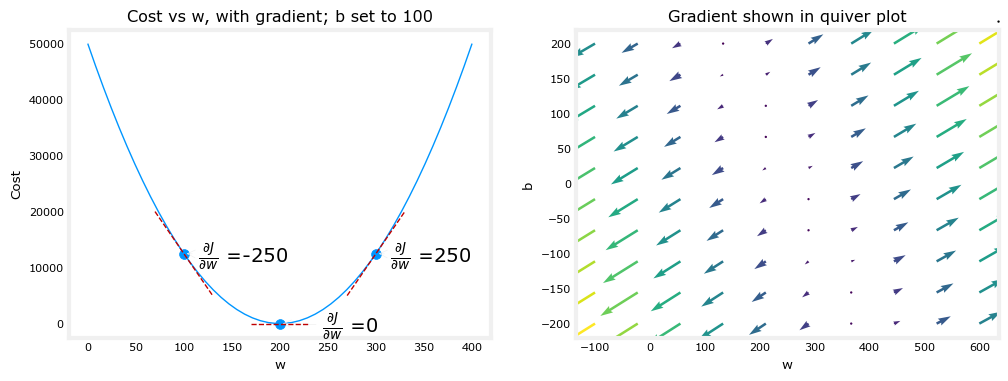

In [19]:
plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()

Arriba, la gráfica de la izquierda muestra $\frac{\partial J(w,b)}{\partial w}$ o la pendiente de la curva de costo respecto a $w$ en tres puntos. En el lado derecho de la gráfica, la derivada es positiva, mientras que en el lado izquierdo es negativa. Debido a la 'forma de tazón', las derivadas siempre guiarán el descenso de gradiente hacia el fondo donde el gradiente es cero.

La gráfica de la izquierda tiene $b=100$ fijo. El descenso de gradiente utilizará tanto $\frac{\partial J(w,b)}{\partial w}$ como $\frac{\partial J(w,b)}{\partial b}$ para actualizar los parámetros. El 'gráfico de flechas' (quiver) a la derecha proporciona una forma de visualizar el gradiente de ambos parámetros. El tamaño de las flechas refleja la magnitud del gradiente en ese punto. La dirección y pendiente de la flecha reflejan la razón entre $\frac{\partial J(w,b)}{\partial w}$ y $\frac{\partial J(w,b)}{\partial b}$ en ese punto.
Nota que el gradiente apunta *lejos* del mínimo. Revisa la ecuación (3) anterior. El gradiente escalado se *resta* del valor actual de $w$ o $b$. Esto mueve el parámetro en una dirección que reducirá el costo.

<a name="toc_40291_2.5"></a>
### Descenso de Gradiente
Ahora que se pueden calcular los gradientes, el descenso de gradiente, descrito en la ecuación (3) anterior, puede implementarse abajo en `gradient_descent`. Los detalles de la implementación se describen en los comentarios. A continuación, utilizarás esta función para encontrar los valores óptimos de $w$ y $b$ en los datos de entrenamiento.

In [20]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Realiza descenso de gradiente para ajustar w,b. Actualiza w,b tomando
    num_iters pasos de gradiente con tasa de aprendizaje alpha

    Args:
      x (ndarray (m,))  : Datos, m ejemplos
      y (ndarray (m,))  : valores objetivo
      w_in,b_in (escalar): valores iniciales de los parámetros del modelo
      alpha (float):     Tasa de aprendizaje
      num_iters (int):   número de iteraciones para ejecutar descenso de gradiente
      cost_function:     función para calcular el costo
      gradient_function: función para calcular el gradiente

    Returns:
      w (escalar): Valor actualizado del parámetro después de ejecutar descenso de gradiente
      b (escalar): Valor actualizado del parámetro después de ejecutar descenso de gradiente
      J_history (List): Historial de valores de costo
      p_history (list): Historial de parámetros [w,b]
      """

    # Un arreglo para guardar el costo J y los w en cada iteración, principalmente para graficar después
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        # Calcular el gradiente y actualizar los parámetros usando gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)

        # Actualizar parámetros usando la ecuación (3) anterior
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        # Guardar el costo J en cada iteración
        if i<100000:      # prevenir agotamiento de recursos
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Imprimir el costo cada 10 veces o tantas iteraciones si < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteración {i:4}: Costo {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, J_history, p_history #retorna w y el historial de J,w para graficar

<div style='background-color:#e0f2fe; color:#1e3a8a; padding:16px; border-radius:8px; border:1px solid #38bdf8; margin-bottom:12px;'>
<b>¿Qué es el descenso de gradiente?</b><br>
<ul>
  <li>Es el proceso que permite al modelo aprender de manera inteligente y sistemática.</li>
  <li>Usa la información del gradiente para ajustar los parámetros poco a poco.</li>
  <li>Es como bajar una montaña buscando el punto más bajo: cada paso te acerca al objetivo.</li>
  <li>Si los pasos son muy grandes, puedes pasarte del objetivo; si son muy pequeños, tardarás mucho en llegar.</li>
  <li>Es fundamental porque asegura que el modelo mejore con cada iteración.</li>
</ul>
</div>

## Paso 4: Implementación del Descenso de Gradiente

La función `gradient_descent` automatiza el proceso de ajuste de los parámetros $w$ y $b$. Utiliza los gradientes calculados para actualizar los valores en cada iteración, buscando siempre reducir el costo.

- Inicializo los parámetros y defino la tasa de aprendizaje.
- En cada iteración, calculo el gradiente y actualizo los parámetros.
- Guardo el historial de costos y parámetros para analizar el progreso.

Este proceso es el corazón del aprendizaje automático, ya que permite que el modelo aprenda de los datos de manera sistemática y eficiente.

<div style='background-color:#FFA50022; color:#b45309; padding:10px; border-radius:6px;'><b>Reflexión personal:</b><br>Al experimentar con la tasa de aprendizaje, comprobé que si es muy alta, el modelo puede divergir y nunca encontrar la solución óptima. Si es muy baja, el aprendizaje es muy lento. Encontrar el equilibrio es clave para un aprendizaje eficiente.</div>

In [21]:
# inicializar parámetros
w_init = 0
b_init = 0
# algunos ajustes para descenso de gradiente
iterations = 10000
tmp_alpha = 1.0e-2
# ejecutar descenso de gradiente
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) encontrados por descenso de gradiente: ({w_final:8.4f},{b_final:8.4f})")

Iteración    0: Costo 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteración 1000: Costo 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteración 2000: Costo 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteración 3000: Costo 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteración 4000: Costo 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteración 5000: Costo 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteración 6000: Costo 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteración 7000: Costo 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteración 8000: Costo 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteración 9000: Costo 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.

<div style='background-color:#e0f2fe; color:#1e3a8a; padding:16px; border-radius:8px; border:1px solid #38bdf8; margin-bottom:12px;'>
<b>¿Qué sucede cuando ejecutamos el descenso de gradiente?</b><br>
<ul>
  <li>El modelo comienza a aprender y mejora sus predicciones paso a paso.</li>
  <li>El valor de la función de costo (el error) va disminuyendo, mostrando que el modelo entiende mejor la relación entre los datos.</li>
  <li>Los parámetros se ajustan en cada paso, acercándose a los valores óptimos.</li>
  <li>Es como ver a alguien practicar y mejorar con cada intento.</li>
  <li>Este proceso demuestra que el modelo está aprendiendo correctamente y que el método funciona.</li>
</ul>
</div>

## Paso 5: Análisis de Resultados y Reflexiones

Después de ejecutar el descenso de gradiente, obtuve los valores óptimos de $w$ y $b$. Estos parámetros permiten que el modelo realice predicciones precisas sobre los datos de entrenamiento y nuevos datos.

- Observé que el costo disminuye progresivamente, lo que indica que el modelo está aprendiendo.
- Los valores finales de $w$ y $b$ se aproximan a la mejor solución posible para los datos dados.

<div style='background-color:#FFA50022; color:#b45309; padding:10px; border-radius:6px;'><b>Reflexión personal:</b><br>Me di cuenta de que el descenso de gradiente es un proceso iterativo que requiere paciencia y análisis constante de los resultados para asegurar que el modelo está convergiendo correctamente. Aprendí a confiar en el proceso y a interpretar los resultados con sentido crítico.</div>

---

## Conclusiones Generales

- El descenso de gradiente es una técnica poderosa para optimizar modelos de regresión lineal.
- Documentar cada paso me ayudó a comprender el proceso y facilitó la identificación de errores o mejoras.
- La elección adecuada de parámetros, como la tasa de aprendizaje, fue crucial para el éxito del algoritmo.

<div style='background-color:#FFA50022; color:#b45309; padding:10px; border-radius:6px;'><b>Reflexión final:</b><br>Al finalizar este trabajo, entendí que el aprendizaje automático es un proceso sistemático, basado en matemáticas, donde cada decisión y parámetro afecta el resultado final. Documentar y analizar críticamente cada paso fue esencial para mi aprendizaje efectivo.</div>

Problema que Resuelve
Ejecuta el proceso completo de aprendizaje automático: toma datos sin procesar y encuentra automáticamente los parámetros óptimos del modelo.

Por qué es el Corazón del Ejercicio
1. Orquestador Principal
Coordina todas las funciones anteriores (compute_cost y compute_gradient) para realizar el aprendizaje iterativo.

2. Automatización del Aprendizaje
Convierte el problema manual de "adivinar parámetros" en un proceso automático que mejora con cada iteración.

3. Convergencia Garantizada
Implementa el algoritmo matemático que garantiza encontrar la mejor solución posible para el problema planteado.

Impacto Concreto
Sin esta función: Tendrías las herramientas (cost, gradient) pero ningún proceso que las use para aprender.

Con esta función: El sistema completo funciona - toma datos de entrada y produce parámetros optimizados automáticamente.

Tómate un momento y observa algunas características del proceso de descenso de gradiente impreso arriba.  

- El costo inicia grande y disminuye rápidamente como se describe en la diapositiva de la clase.
- Las derivadas parciales, `dj_dw` y `dj_db`, también se hacen más pequeñas, rápidamente al principio y luego más lentamente. Como se muestra en el diagrama de la clase, a medida que el proceso se acerca al 'fondo del tazón', el progreso es más lento debido al menor valor de la derivada en ese punto.
- El progreso se ralentiza aunque la tasa de aprendizaje, alpha, permanece fija.

### Costo versus iteraciones del descenso de gradiente
Una gráfica de costo versus iteraciones es una medida útil del progreso en el descenso de gradiente. El costo siempre debe disminuir en ejecuciones exitosas. El cambio en el costo es tan rápido al inicio, que es útil graficar el descenso inicial en una escala diferente al descenso final. En las gráficas de abajo, observa la escala del costo en los ejes y el paso de iteración.

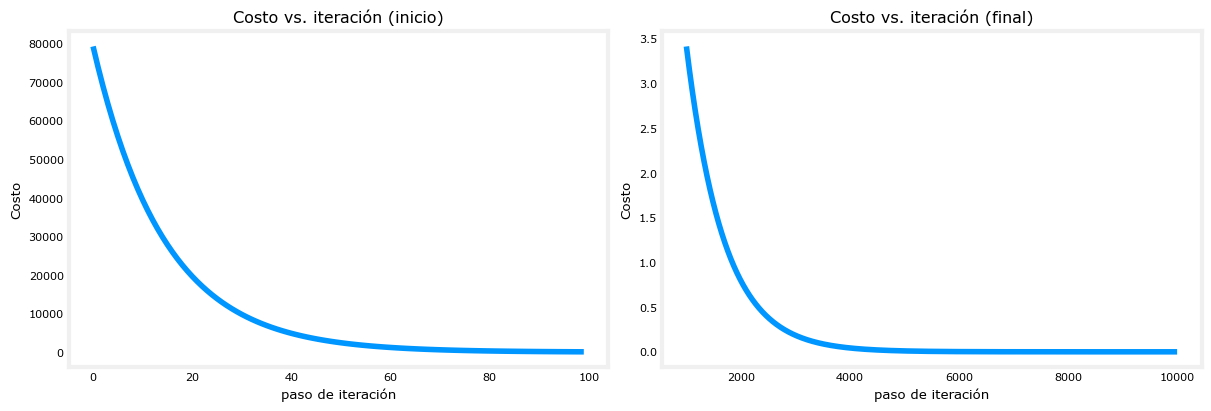

In [22]:
# graficar costo versus iteración
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Costo vs. iteración (inicio)");  ax2.set_title("Costo vs. iteración (final)")
ax1.set_ylabel('Costo')            ;  ax2.set_ylabel('Costo')
ax1.set_xlabel('paso de iteración')  ;  ax2.set_xlabel('paso de iteración')
plt.show()

<div style='background-color:#e0f2fe; color:#1e3a8a; padding:16px; border-radius:8px; border:1px solid #38bdf8; margin-bottom:12px;'>
<b>¿Por qué graficamos el costo?</b><br>
<ul>
  <li>Las gráficas nos ayudan a ver si el modelo realmente está aprendiendo.</li>
  <li>Si la línea del costo baja, el modelo está mejorando; si sube o se mantiene igual, algo no está funcionando bien.</li>
  <li>Es como ver el progreso de alguien que aprende a andar en bicicleta: al principio se cae mucho, pero con la práctica mejora.</li>
  <li>Las gráficas permiten detectar problemas y confirmar que el aprendizaje va en la dirección correcta.</li>
  <li>Son una herramienta visual clave para entender el proceso de aprendizaje.</li>
</ul>
</div>

### Predicciones
Ahora que has encontrado los valores óptimos para los parámetros $w$ y $b$, puedes usar el modelo para predecir valores de viviendas basados en los parámetros aprendidos. Como era de esperarse, los valores predichos son casi iguales a los valores de entrenamiento para las mismas viviendas. Además, el valor no incluido en el entrenamiento está en línea con el valor esperado.

In [23]:
print(f"Predicción para casa de 1000 pies²: {w_final*1.0 + b_final:0.1f} mil dólares")
print(f"Predicción para casa de 1200 pies²: {w_final*1.2 + b_final:0.1f} mil dólares")
print(f"Predicción para casa de 2000 pies²: {w_final*2.0 + b_final:0.1f} mil dólares")

Predicción para casa de 1000 pies²: 300.0 mil dólares
Predicción para casa de 1200 pies²: 340.0 mil dólares
Predicción para casa de 2000 pies²: 500.0 mil dólares


<div style='background-color:#e0f2fe; color:#1e3a8a; padding:16px; border-radius:8px; border:1px solid #38bdf8; margin-bottom:12px;'>
<b>¿Cómo usamos el modelo para predecir?</b><br>
<ul>
  <li>Una vez que el modelo ha aprendido, podemos usarlo para hacer predicciones sobre datos nuevos.</li>
  <li>Es como preguntarle a alguien que ya aprendió: "¿Cuánto costaría una casa de cierto tamaño?"</li>
  <li>El modelo utiliza la fórmula aprendida para calcular el precio de casas que no estaban en los datos originales.</li>
  <li>Esto permite aplicar el conocimiento del modelo a situaciones reales y tomar decisiones informadas.</li>
  <li>Las predicciones son útiles para resolver problemas prácticos usando lo aprendido.</li>
</ul>
</div>

<a name="toc_40291_2.6"></a>
## Graficando
Puedes mostrar el progreso del descenso de gradiente durante su ejecución graficando el costo sobre las iteraciones en un gráfico de contorno de cost(w,b).

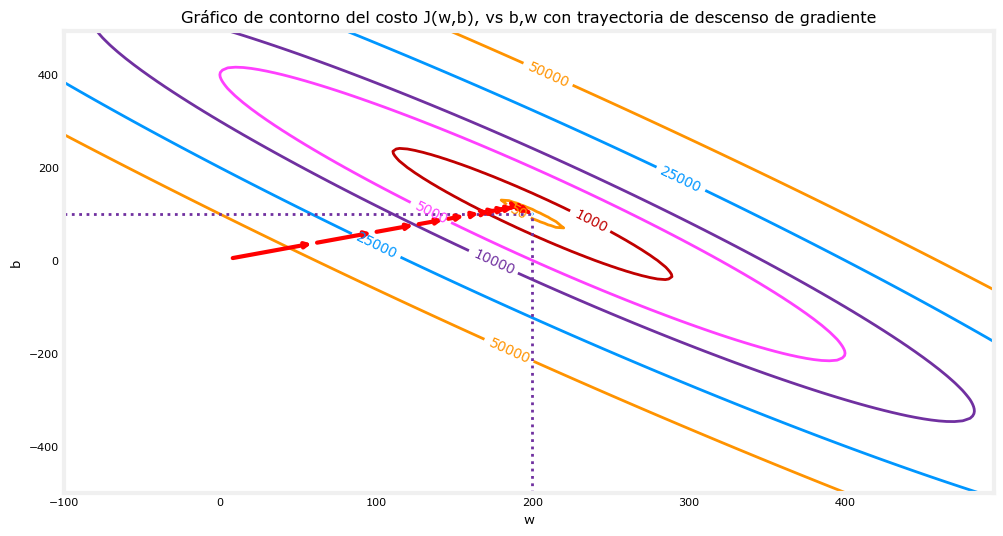

In [24]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, p_hist, ax)
# Se grafica el contorno del costo y la trayectoria del descenso de gradiente

Arriba, el gráfico de contorno muestra el $costo(w,b)$ sobre un rango de $w$ y $b$. Los niveles de costo están representados por los anillos. Sobrepuestos, usando flechas rojas, está la trayectoria del descenso de gradiente. Algunas cosas a notar:
- La trayectoria avanza de manera constante (monótona) hacia su objetivo.
- Los pasos iniciales son mucho más grandes que los pasos cerca del objetivo.

**Acercando la vista (zoom)**, podemos ver los pasos finales del descenso de gradiente. Observa que la distancia entre los pasos disminuye a medida que el gradiente se acerca a cero.

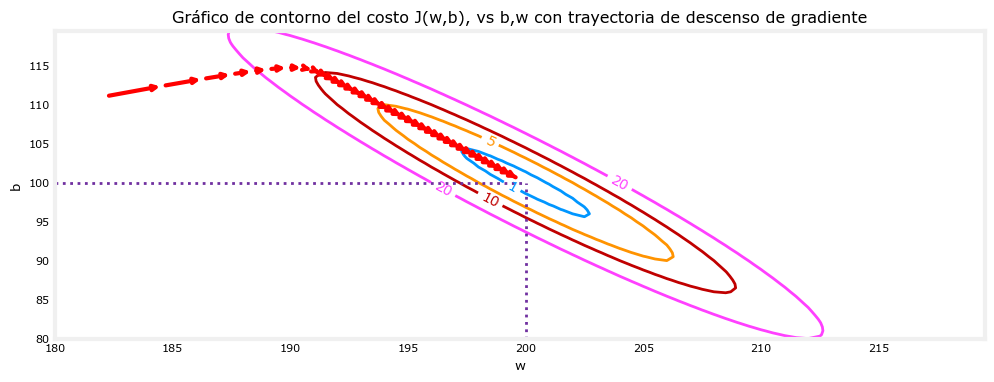

In [25]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, p_hist, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5],
            contours=[1,5,10,20],resolution=0.5)
# Se grafica un acercamiento para ver los últimos pasos del descenso de gradiente

<a name="toc_40291_2.7.1"></a>
### Tasa de aprendizaje aumentada

En la clase, se discutió el valor adecuado de la tasa de aprendizaje, $\alpha$ en la ecuación(3). Mientras más grande sea $\alpha$, más rápido convergerá el descenso de gradiente a una solución. Pero, si es demasiado grande, el descenso de gradiente diverge. Arriba tienes un ejemplo de una solución que converge correctamente.

Probemos aumentar el valor de $\alpha$ y ver qué sucede:

In [26]:
# inicializar parámetros
w_init = 0
b_init = 0
# establecer alpha a un valor grande
iterations = 10
tmp_alpha = 8.0e-1
# ejecutar descenso de gradiente
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)

Iteración    0: Costo 2.58e+05  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  5.200e+02, b: 3.20000e+02
Iteración    1: Costo 7.82e+05  dj_dw:  1.130e+03, dj_db:  7.000e+02   w: -3.840e+02, b:-2.40000e+02
Iteración    2: Costo 2.37e+06  dj_dw: -1.970e+03, dj_db: -1.216e+03   w:  1.192e+03, b: 7.32800e+02
Iteración    3: Costo 7.19e+06  dj_dw:  3.429e+03, dj_db:  2.121e+03   w: -1.551e+03, b:-9.63840e+02
Iteración    4: Costo 2.18e+07  dj_dw: -5.974e+03, dj_db: -3.691e+03   w:  3.228e+03, b: 1.98886e+03
Iteración    5: Costo 6.62e+07  dj_dw:  1.040e+04, dj_db:  6.431e+03   w: -5.095e+03, b:-3.15579e+03
Iteración    6: Costo 2.01e+08  dj_dw: -1.812e+04, dj_db: -1.120e+04   w:  9.402e+03, b: 5.80237e+03
Iteración    7: Costo 6.09e+08  dj_dw:  3.156e+04, dj_db:  1.950e+04   w: -1.584e+04, b:-9.80139e+03
Iteración    8: Costo 1.85e+09  dj_dw: -5.496e+04, dj_db: -3.397e+04   w:  2.813e+04, b: 1.73730e+04
Iteración    9: Costo 5.60e+09  dj_dw:  9.572e+04, dj_db:  5.916e+04   w: -4.845e+04, b:-2.

Problema que Demuestra
Ilustra qué sucede cuando el parámetro alpha (tasa de aprendizaje) es demasiado alto, causando que el algoritmo falle en lugar de converger.

Por qué es Educativo
1. Lección de Límites
Demuestra que "más rápido" no siempre es mejor - un alpha muy alto hace que el algoritmo "salte" la solución óptima.

2. Validación Práctica
Comprueba experimentalmente la teoría: alpha debe estar en un rango específico para que funcione correctamente.

3. Diagnóstico de Problemas
Enseña a identificar cuándo el gradient descent está divergiendo en lugar de convergiendo.

Impacto Concreto
Sin este experimento: Solo sabrías que el algoritmo funciona, pero no por qué a veces falla.

Con este experimento: Entiendes los límites del algoritmo y cómo ajustar parámetros para evitar fallos.

Arriba, $w$ y $b$ están rebotando entre valores positivos y negativos, y el valor absoluto aumenta en cada iteración. Además, en cada iteración $\frac{\partial J(w,b)}{\partial w}$ cambia de signo y el costo está aumentando en vez de disminuir. Esto es una clara señal de que la *tasa de aprendizaje es demasiado grande* y la solución está divergiendo.
Visualicemos esto con una gráfica.

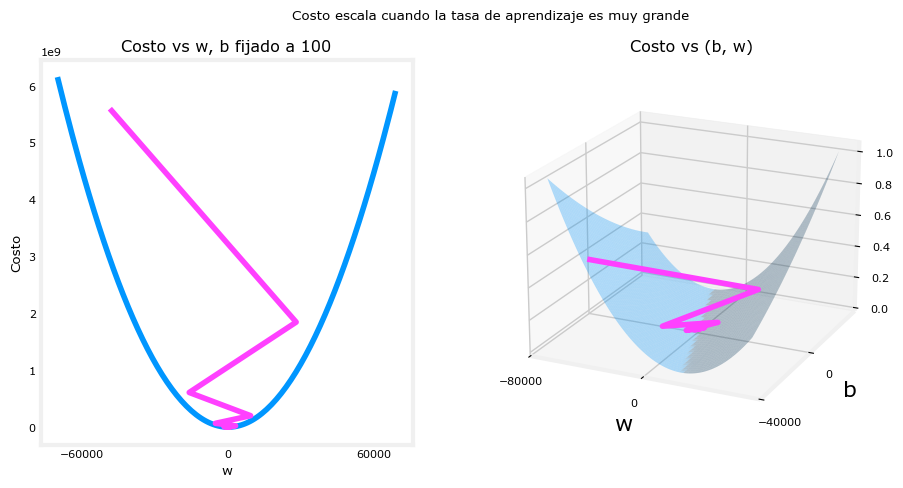

In [27]:
plt_divergence(p_hist, J_hist,x_train, y_train)
plt.show()
# Se grafica la divergencia del descenso de gradiente con tasa de aprendizaje alta

Arriba, la gráfica de la izquierda muestra la progresión de $w$ durante los primeros pasos del descenso de gradiente. $w$ oscila de positivo a negativo y el costo crece rápidamente. El descenso de gradiente está operando sobre ambos, $w$ y $b$ simultáneamente, por lo que se necesita la gráfica 3D de la derecha para ver el panorama completo.

**Conclusion:** El ejercicio demuestra que el machine learning no es "magia" sino matemáticas aplicadas sistemáticamente. La automatización del proceso de encontrar parámetros óptimos representa el núcleo de cómo las máquinas "aprenden" de los datos, transformando información en conocimiento predictivo de manera eficiente y escalable.

## ¡Felicidades!
En este ejercicio usted:
- profundizó en los detalles del descenso de gradiente para una sola variable.
- desarrolló una rutina para calcular el gradiente
- visualizó qué es el gradiente
- completó una rutina de descenso de gradiente
- utilizó descenso de gradiente para encontrar parámetros
- examinó el impacto de ajustar la tasa de aprendizaje

<div style='background-color:#d1fae5; color:#065f46; padding:16px; border-radius:8px; border:1px solid #10b981;'>
<h4>Conclusiones</h4>
</div>


1. **¿Qué es un modelo de regresión lineal?**

   Es una forma matemática de predecir un valor (por ejemplo, el precio de una casa) a partir de una característica (como el tamaño de la casa). La fórmula es:

   $f_{w,b}(x) = wx + b$

   Aquí, $w$ es el peso (cuánto influye el tamaño en el precio) y $b$ es el punto de partida (el precio base cuando el tamaño es cero).

2. **¿Cómo se usan los datos?**

   Se parte de ejemplos reales, como pares $(x, y)$ donde $x$ es el tamaño de la casa y $y$ es el precio. Por ejemplo: $x = 1.0$ (1000 m²), $y = 300$ (mil dólares). Estos datos ayudan al modelo a aprender la relación entre tamaño y precio.

3. **¿Para qué sirve la función de costo?**

   La función de costo mide qué tan buenas son las predicciones del modelo. Se calcula así:

   $J(w, b) = \frac{1}{2m} \sum_{i=0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$

   Si el resultado es bajo, el modelo predice bien; si es alto, necesita mejorar.

4. **¿Qué es el gradiente y por qué es importante?**

   El gradiente es una herramienta matemática que indica en qué dirección y cuánto deben cambiarse $w$ y $b$ para que el modelo mejore. Se calcula así:

   $\frac{\partial J(w,b)}{\partial w} = \frac{1}{m} \sum_{i=0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)}$

   $\frac{\partial J(w,b)}{\partial b} = \frac{1}{m} \sum_{i=0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})$

   Es como una brújula que guía el aprendizaje.

5. **¿Cómo aprende el modelo? (Descenso de gradiente)**

   El modelo ajusta $w$ y $b$ poco a poco, usando el gradiente, para que las predicciones sean cada vez mejores. Se actualizan así:

   $w := w - \alpha \frac{\partial J(w,b)}{\partial w}$

   $b := b - \alpha \frac{\partial J(w,b)}{\partial b}$

   $\alpha$ es la "velocidad" de aprendizaje: si es muy alta, el modelo se puede equivocar mucho; si es muy baja, aprende muy lento.

6. **¿Por qué es importante elegir bien la velocidad de aprendizaje ($\alpha$)?**

   Si $\alpha$ es muy grande, el modelo puede saltarse la mejor solución y nunca aprender bien. Si es muy pequeño, el aprendizaje será muy lento y puede tardar mucho en mejorar.

7. **¿Cómo sé si el modelo está aprendiendo?**

   El valor de la función de costo $J(w, b)$ debe ir bajando con el tiempo. Si no baja, hay que revisar los datos o los parámetros.

8. **¿Por qué es útil graficar el proceso?**

   Ver gráficos del costo y de cómo cambian $w$ y $b$ ayuda a entender si el modelo está mejorando y a detectar errores fácilmente.

9. **¿Qué hago cuando el modelo ya aprendió?**

   Cuando el modelo tiene buenos valores de $w$ y $b$, puedo usar la fórmula $f_{w,b}(x)$ para predecir el precio de casas nuevas, aunque no estén en los datos originales.

10. **¿Por qué es importante documentar y reflexionar?**

   Explicar cada paso y pensar en lo que ocurre me ayuda a entender mejor el proceso y a poder repetirlo o mejorarlo en el futuro.

<div style='background-color:#d1fae5; color:#065f46; padding:8px; border-radius:6px; border:1px solid #10b981;'><b>Actividad 1 - Unidad 1 - Machine Learning.</b></div>

<div style='background-color:#e0f2fe; color:#1e3a8a; padding:16px; border-radius:8px; border:1px solid #38bdf8; margin-bottom:12px;'>
<b>¿Qué aprendimos?</b><br>
<ul>
  <li>Recorrimos todo el proceso de aprendizaje automático usando regresión lineal y descenso de gradiente.</li>
  <li>Aprendiste cómo se preparan los datos y cómo se construye y ajusta el modelo.</li>
  <li>Vimos cómo se mide el desempeño y cómo se interpreta el resultado.</li>
  <li>Cada paso fue explicado con ejemplos y analogías para que cualquier persona pueda entenderlo.</li>
  <li>Ahora tienes las bases para explorar más sobre machine learning y aplicar estos conceptos en problemas reales.</li>
  <li>Recuerda: el aprendizaje automático es una herramienta poderosa y accesible para todos. ¡Sigue practicando y experimentando!</li>
</ul>
</div>